### NoteBook done by : Er-rahmany Oussama

##### Le but de ce notebook est d'enrtainer un agent pour jouer le jeu flappy bird

In [119]:
import os
import sys
import time
import random

import gymnasium as gym
import text_flappy_bird_gym

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D

from tqdm import tqdm
from collections import defaultdict


In [ ]:

class SarsaLambdaAgent:
    def __init__(self, eps, step_size, discount, lambda_):
        self.eps = eps
        self.step_size = step_size
        self.discount = discount
        self.lambda_ = lambda_
        self.q = defaultdict(lambda: np.zeros(2)) # as our state space is "Small" we will use q_table directly 
        self.z = defaultdict(lambda : np.zeros(2))
        self.rewards = []

    def select_action(self, state, action_space):
        """
        ε-greedy action selection
        """
        if np.random.uniform(0, 1) < self.eps:
            return action_space.sample()
        else:
            return np.argmax(self.q[state])

    def update(self, state, action, reward, next_state, next_action, done, replacing=False):
        # δ ← R
        delta = reward
        
        delta -= self.q[state][action]
        if not done : 
            delta += self.discount * self.q[next_state][next_action]
            
        if replacing:
                self.z[state][action] = 1
        else:
                self.z[state][action] += 1


        
        

        
        for s in self.q.keys() :
            for a in range(2) :
                self.q[s][a] += self.step_size * delta * self.z[s][a]
                if not done : 
                    self.z[s][a]  *= self.discount * self.lambda_
                else :
                    self.z[s][a] = 0
        

    def train(self, env, episodes=100000):
        for episode in tqdm(range(episodes), desc="Training Sarsa(λ) Agent"):
            state, _ = env.reset()
            done = False
            total_reward = 0

            self.z = defaultdict(lambda : np.zeros(2)) 

            action = self.select_action(state, env.action_space)

            while not done:
                next_state, reward, done, _, _ = env.step(action)
                next_action = self.select_action(next_state, env.action_space)
                self.update(state, action, reward, next_state, next_action, done)
                state = next_state
                action = next_action
                total_reward += reward

            self.rewards.append(total_reward)

    def plot_rewards(self, window_size=500):
        def moving_average(data, window_size):
            return np.convolve(data, np.ones(window_size) / window_size, mode="valid")

        plt.figure(figsize=(12, 6))
        plt.plot(moving_average(self.rewards, window_size), label=f"SARSA(λ) (λ={self.lambda_})")
        plt.xlabel("Episode")
        plt.ylabel("Total Reward")
        plt.title("SARSA(λ) Learning Curve")
        plt.legend()
        plt.grid(True)
        plt.show()


In [67]:
sarsa_episode = 20000

## In this section we will plot the evolution of the reward in the training process of our SarsaAgent

Training Sarsa(λ) Agent: 100%|██████████| 30000/30000 [41:55<00:00, 11.92it/s]  


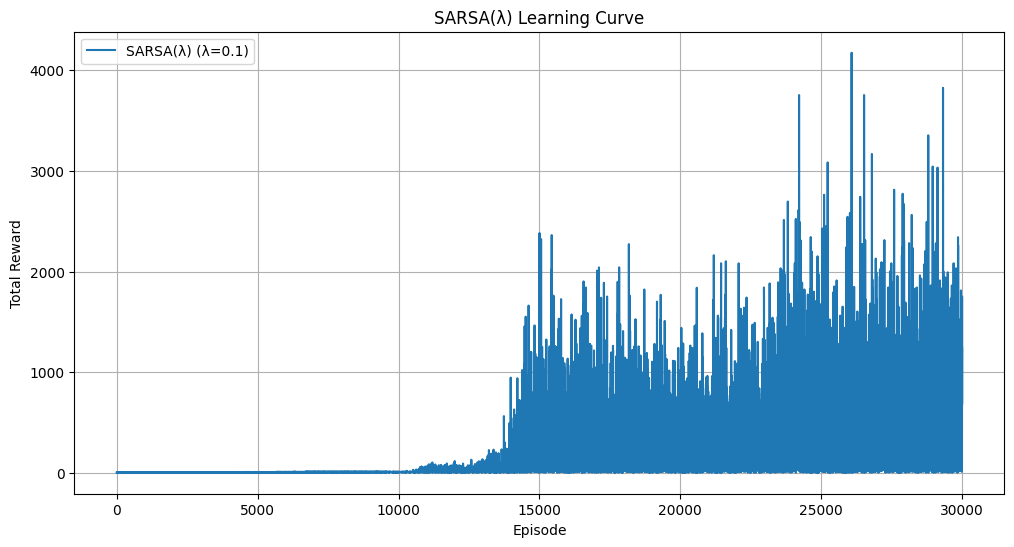

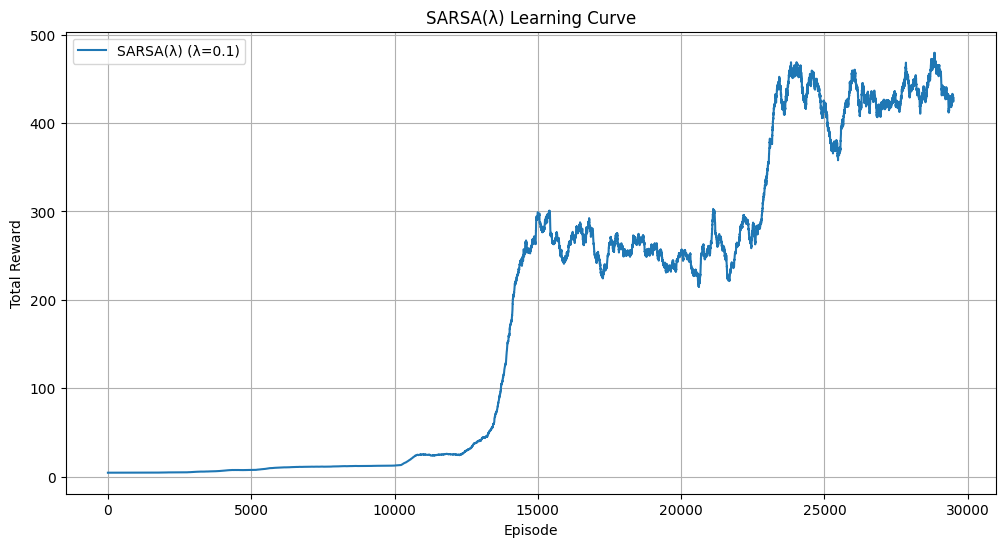

In [84]:
env = gym.make('TextFlappyBird-v0', height=15, width=20, pipe_gap=4)
agent_sarsa = SarsaLambdaAgent(eps=0.02, step_size=0.2, lambda_= 0.1 , discount=0.99)
agent_sarsa.train(env , episodes=30000)
rewards_sarsa = agent_sarsa.rewards
agent_sarsa.plot_rewards(1)
agent_sarsa.plot_rewards(500)
env.close()

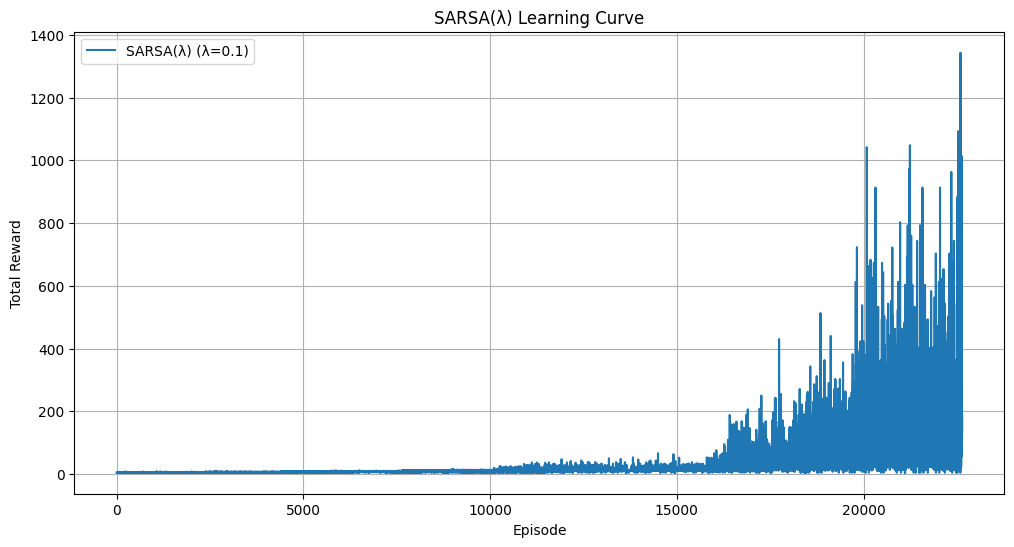

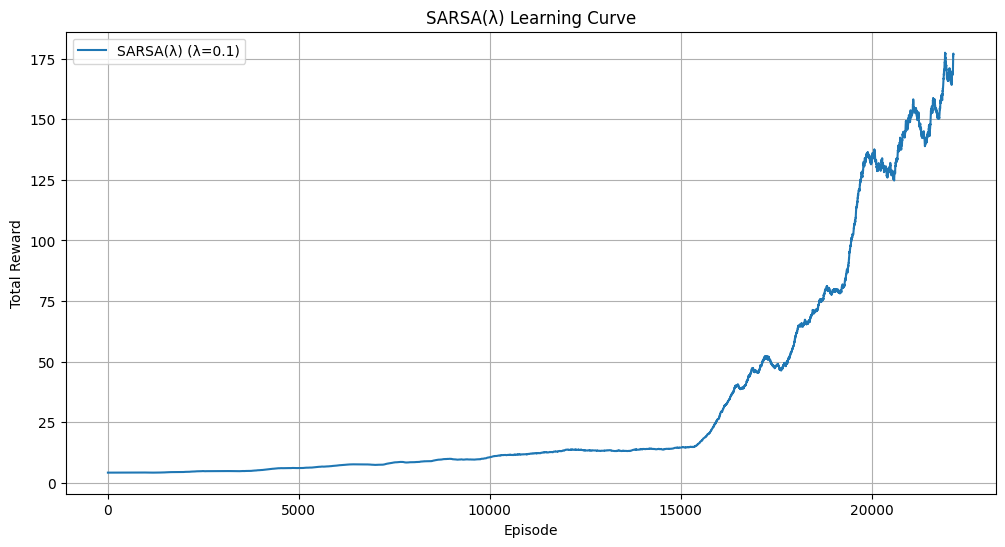

In [145]:
agent_sarsa.plot_rewards(1)
agent_sarsa.plot_rewards(500)
env.close()


Training SARSA(λ) agent with λ = 0.0


Training Sarsa(λ) Agent: 100%|██████████| 20000/20000 [05:11<00:00, 64.13it/s] 



Training SARSA(λ) agent with λ = 0.4


Training Sarsa(λ) Agent: 100%|██████████| 20000/20000 [15:13<00:00, 21.89it/s] 



Training SARSA(λ) agent with λ = 0.7


Training Sarsa(λ) Agent: 100%|██████████| 20000/20000 [18:37<00:00, 17.90it/s] 



Training SARSA(λ) agent with λ = 0.9


Training Sarsa(λ) Agent: 100%|██████████| 20000/20000 [20:09<00:00, 16.54it/s] 



Training SARSA(λ) agent with λ = 1.0


Training Sarsa(λ) Agent: 100%|██████████| 20000/20000 [04:30<00:00, 73.83it/s] 


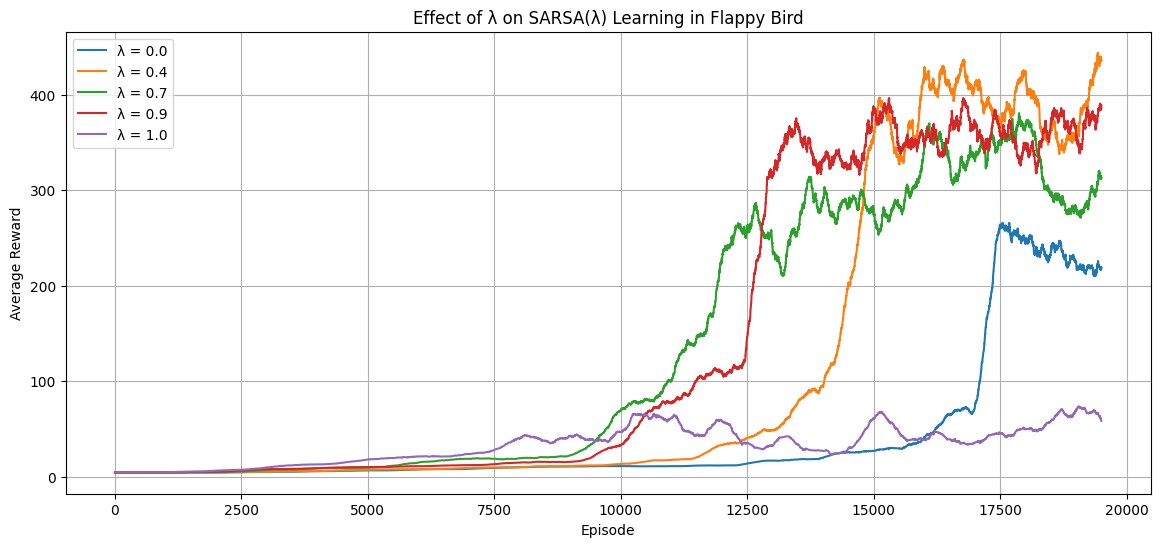

In [ ]:
lambdas = [0.0, 0.4, 0.7, 0.9, 1.0]
agents = {}
rewards_dict = {}

for i in lambdas:
    print(f"\nTraining SARSA(λ) agent with λ = {i}")
    env = gym.make('TextFlappyBird-v0', height=15, width=20, pipe_gap=4)

    agent = SarsaLambdaAgent(eps=0.02, step_size=0.2, lambda_=i, discount=0.99)
    agent.train(env, episodes=sarsa_episode)

    agents[i] = agent
    rewards_dict[i] = agent.rewards

    env.close()


plt.figure(figsize=(14, 6))
window_size = 500

for i in lambdas:
    rewards = rewards_dict[i]
    moving_avg = np.convolve(rewards, np.ones(window_size)/window_size, mode="valid")
    plt.plot(moving_avg, label=f"λ = {i}")

plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.title("Effect of λ on SARSA(λ) Learning in Flappy Bird")
plt.legend()
plt.grid(True)
plt.show()

### Effect of eps in Sarsa


Training SARSA(λ) agent with eps = 0.001


Training Sarsa(λ) Agent: 100%|██████████| 20000/20000 [00:11<00:00, 1732.80it/s]



Training SARSA(λ) agent with eps = 0.01


Training Sarsa(λ) Agent: 100%|██████████| 20000/20000 [00:51<00:00, 391.01it/s]



Training SARSA(λ) agent with eps = 0.1


Training Sarsa(λ) Agent: 100%|██████████| 20000/20000 [13:09<00:00, 25.34it/s]



Training SARSA(λ) agent with eps = 0.5


Training Sarsa(λ) Agent: 100%|██████████| 20000/20000 [03:43<00:00, 89.43it/s] 



Training SARSA(λ) agent with eps = 0.7


Training Sarsa(λ) Agent: 100%|██████████| 20000/20000 [02:44<00:00, 121.42it/s]


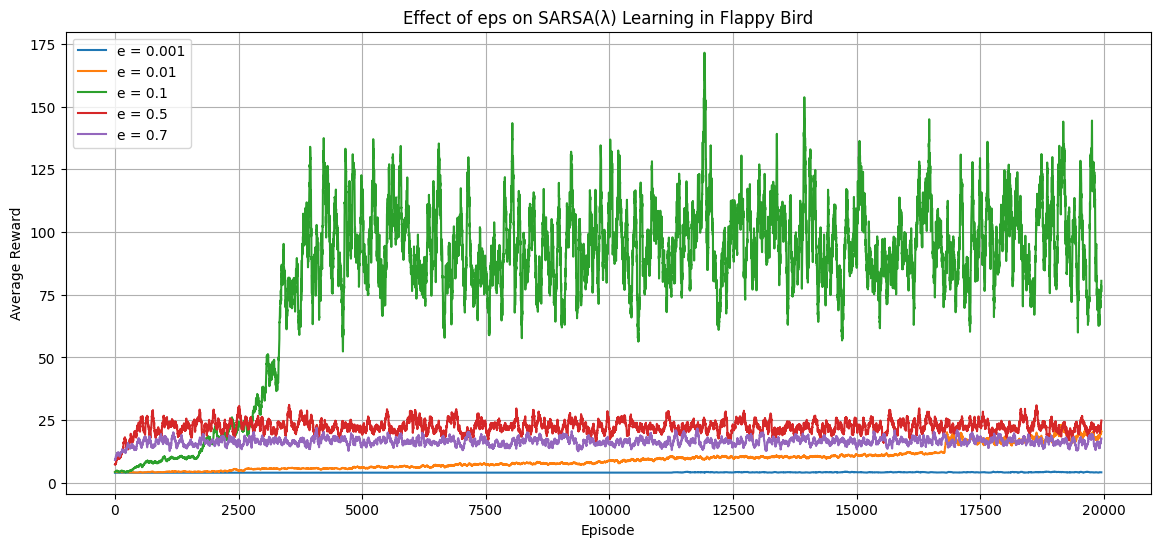

In [ ]:
eps__ = [0.001, 0.01, 0.1, 0.5, 0.7]
agents = {}
rewards_dict_eps = {}

for i in eps__:
    print(f"\nTraining SARSA(λ) agent with eps = {i}")
    env = gym.make('TextFlappyBird-v0', height=15, width=20, pipe_gap=4)

    agent = SarsaLambdaAgent(eps= i , step_size=0.2, lambda_=0.7, discount=0.99)
    agent.train(env, episodes=sarsa_episode)

    agents[i] = agent
    rewards_dict_eps[i] = agent.rewards

    env.close()

plt.figure(figsize=(14, 6))
window_size = 50

for i in eps__:
    rewards = rewards_dict_eps[i]
    moving_avg = np.convolve(rewards, np.ones(window_size)/window_size, mode="valid")
    plt.plot(moving_avg, label=f"e = {i}")

plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.title("Effect of eps on SARSA(λ) Learning in Flappy Bird")
plt.legend()
plt.grid(True)
plt.show()

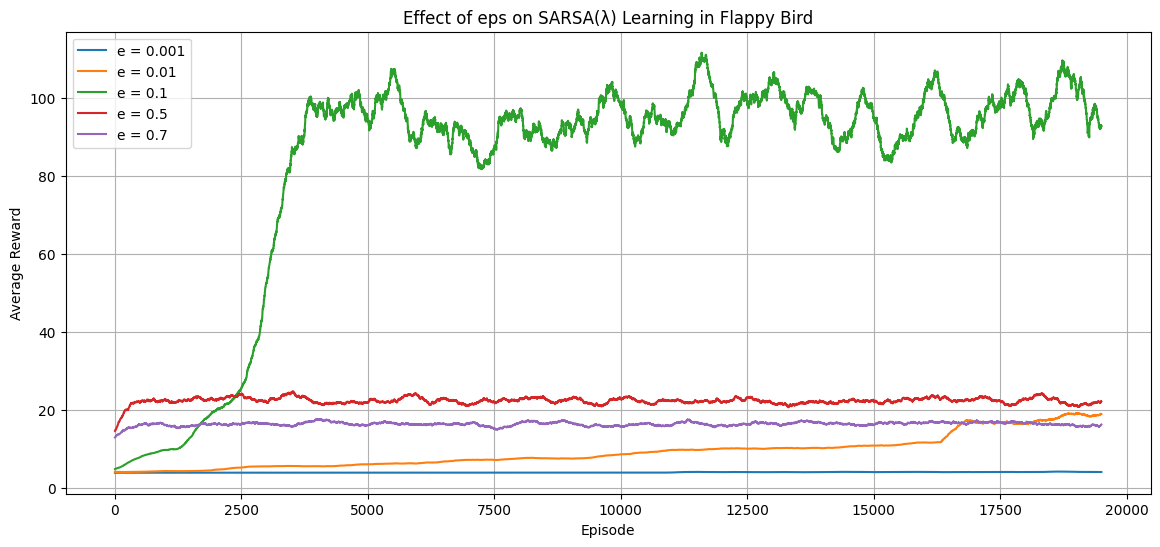

In [90]:
plt.figure(figsize=(14, 6))
window_size = 500

for i in eps__:
    rewards = rewards_dict_eps[i]
    moving_avg = np.convolve(rewards, np.ones(window_size)/window_size, mode="valid")
    plt.plot(moving_avg, label=f"e = {i}")

plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.title("Effect of eps on SARSA(λ) Learning in Flappy Bird")
plt.legend()
plt.grid(True)
plt.show()

### effect of discount factor


Training SARSA(λ) agent with discount = 0.1


Training Sarsa(λ) Agent: 100%|██████████| 20000/20000 [00:36<00:00, 554.13it/s]



Training SARSA(λ) agent with discount = 0.3


Training Sarsa(λ) Agent: 100%|██████████| 20000/20000 [01:10<00:00, 282.71it/s]



Training SARSA(λ) agent with discount = 0.5


Training Sarsa(λ) Agent: 100%|██████████| 20000/20000 [11:36<00:00, 28.73it/s] 



Training SARSA(λ) agent with discount = 0.7


Training Sarsa(λ) Agent: 100%|██████████| 20000/20000 [16:00<00:00, 20.82it/s] 



Training SARSA(λ) agent with discount = 0.99


Training Sarsa(λ) Agent: 100%|██████████| 20000/20000 [20:39<00:00, 16.14it/s] 


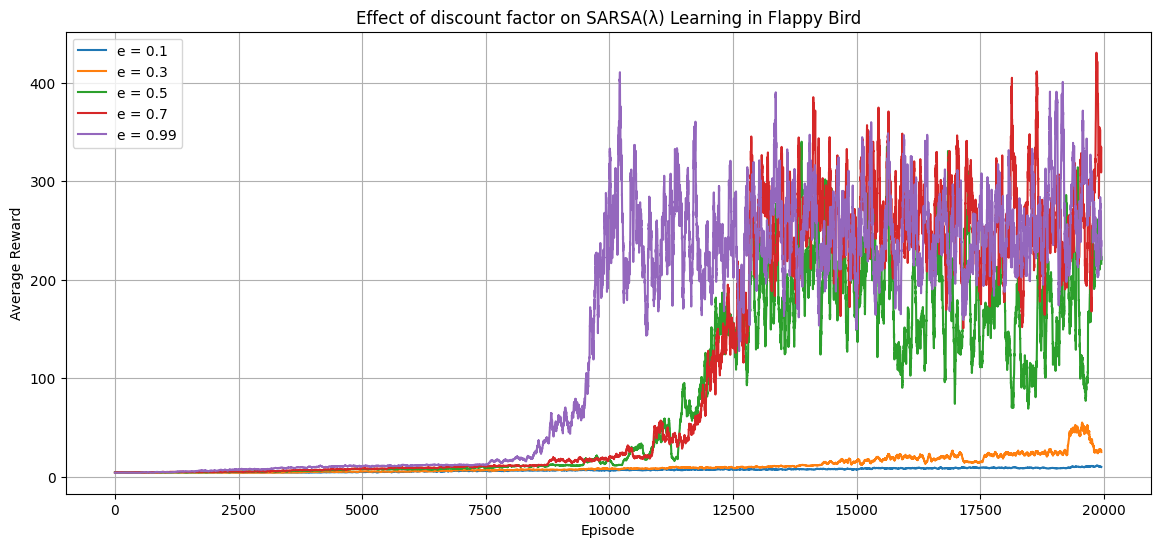

In [ ]:
disc__ = [0.1, 0.3, 0.5, 0.7, 0.99]
agents = {}
rewards_dict_disc = {}

for i in disc__:
    print(f"\nTraining SARSA(λ) agent with discount = {i}")
    env = gym.make('TextFlappyBird-v0', height=15, width=20, pipe_gap=4)

    agent = SarsaLambdaAgent(eps= 0.03 , step_size=0.2, lambda_=0.7, discount=i)
    agent.train(env, episodes=sarsa_episode)

    agents[i] = agent
    rewards_dict_disc[i] = agent.rewards

    env.close()

plt.figure(figsize=(14, 6))
window_size = 50

for i in disc__:
    rewards = rewards_dict_disc[i]
    moving_avg = np.convolve(rewards, np.ones(window_size)/window_size, mode="valid")
    plt.plot(moving_avg, label=f"e = {i}")

plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.title("Effect of discount factor on SARSA(λ) Learning in Flappy Bird")
plt.legend()
plt.grid(True)
plt.show()

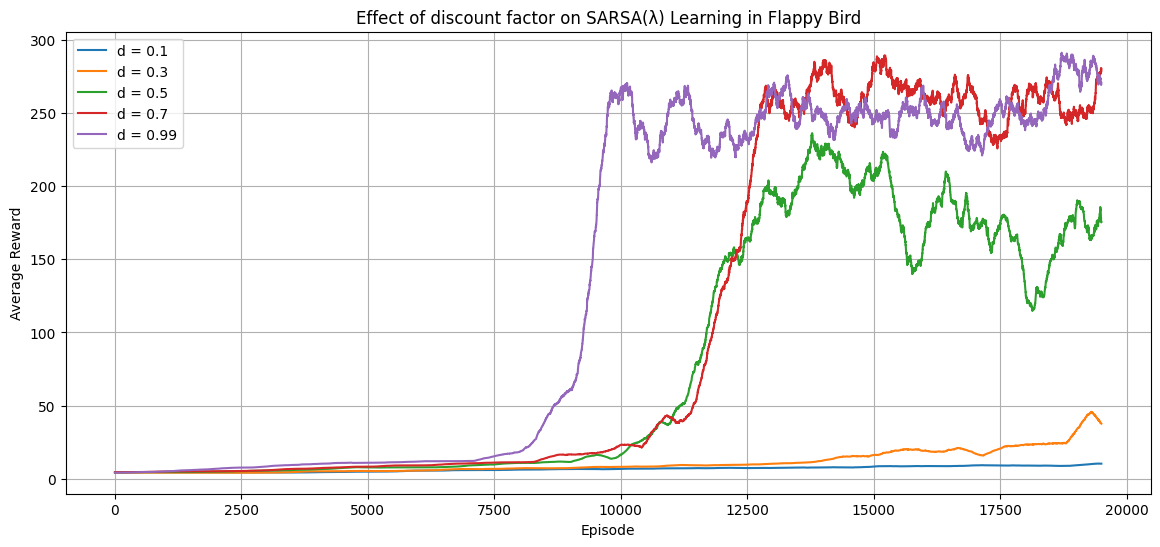

In [91]:
plt.figure(figsize=(14, 6))
window_size = 500

for i in disc__:
    rewards = rewards_dict_disc[i]
    moving_avg = np.convolve(rewards, np.ones(window_size)/window_size, mode="valid")
    plt.plot(moving_avg, label=f"d = {i}")

plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.title("Effect of discount factor on SARSA(λ) Learning in Flappy Bird")
plt.legend()
plt.grid(True)
plt.show()

### In this section we plot the Policy of our SarsaAgent

In [71]:
x_dist_max = 20-int(20*0.3)-1
x_dist_min = 0
y_dist_max = 15-1-int(4//2)-1
y_dist_min = -y_dist_max
print(x_dist_max , y_dist_min)

13 -11


In [ ]:

def get_policy_matrix(q_table) : 
    def get_action(x , y) : 
        if (x , y) in q_table : 
            return np.argmax(q_table[x , y])
        else : 
            return 0 
    def create_grid() : 
        x_range = np.arange(0 , 14)
        y_range = np.arange(-11 , 12)
        matrix_action = [[get_action(x , y) for x in x_range] for y in y_range]
        return matrix_action
    
    return create_grid()
def plot_policy(q_table) : 
    
    policy_matrix = get_policy_matrix(q_table)

   
    plt.figure(figsize=(12, 8))

   
    cmap = mcolors.ListedColormap([ '#90ee90', '#d3d3d3'])

    
    plt.imshow(policy_matrix, cmap=cmap, 
            extent=[-0.5, 13.5, -11.5, 11.5],
            aspect='auto', origin='lower')

    


    legend_patches = [
        mpatches.Patch(color='#d3d3d3', label='Idle'),
        mpatches.Patch(color='#90ee90', label='Flap')
    ]
    plt.legend(handles=legend_patches, loc='upper right')
    
    plt.xlabel('Width', fontsize=12)
    plt.ylabel('Height', fontsize=12)
    plt.title('Policy of our SARSA Agent', fontsize=14, pad=20)

    
    plt.xticks(np.arange(0, 14, 1))
    plt.yticks(np.arange(-11, 12, 1))

    
    plt.grid(which='both', color='gray', linestyle='-', linewidth=0.3)

    plt.tight_layout()
    plt.show()






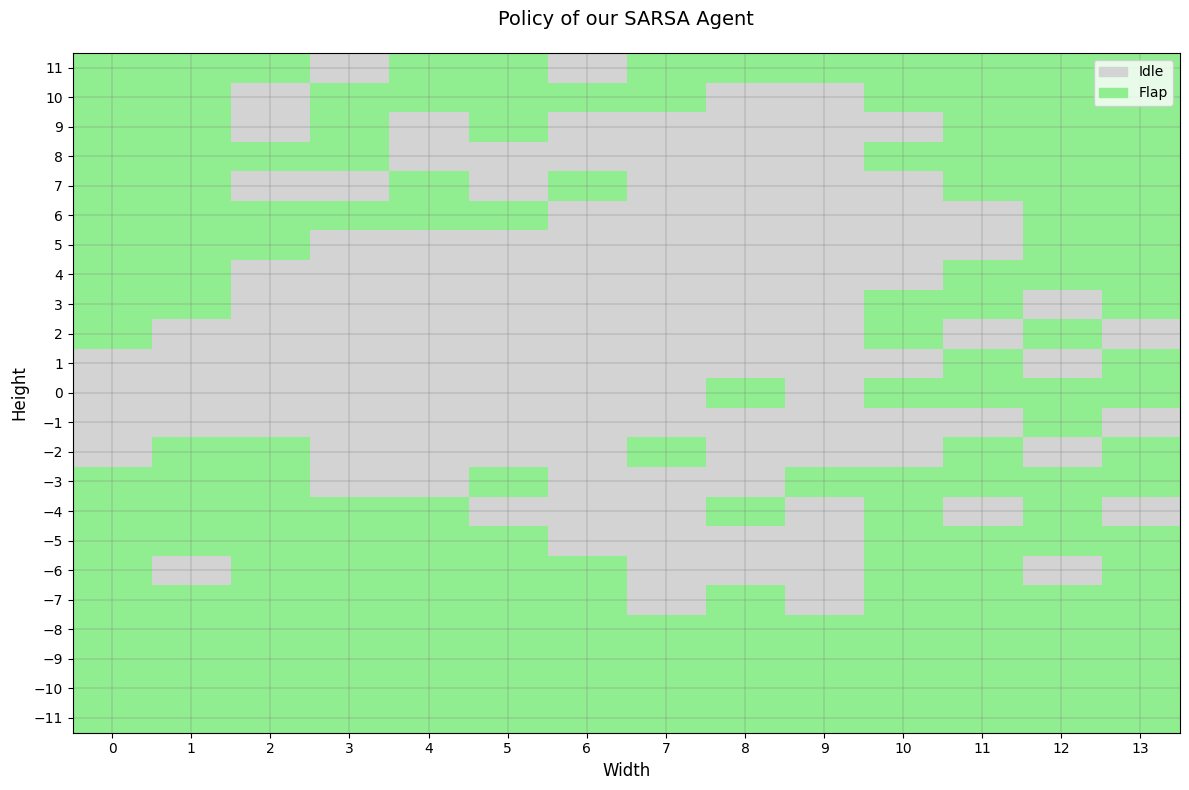

In [86]:
plot_policy(agent_sarsa.q)

## Monter Carlo agent

In [ ]:
class MonteCarloAgent:
    def __init__(self, eps=0.1, step_size=0.1, discount=0.99):
        self.eps = eps
        self.step_size = step_size
        self.discount = discount
        self.q = defaultdict(lambda: np.zeros(2))
        self.episode = []
        self.rewards = []

    def select_action(self, state, action_space):
     
        if np.random.uniform(0, 1) < self.eps:
            return action_space.sample()
        else:
            return np.argmax(self.q[state])

    def store(self, state, action, reward):
        
        self.episode.append((state, action, reward))

    def update(self):
        G = 0
        visited = set()
        for state, action, reward in reversed(self.episode):
            G = self.discount * G + reward
            if (state, action) not in visited:
                self.q[state][action] += self.step_size * (G - self.q[state][action])
                visited.add((state, action))
        self.episode = []

    def train(self, env, num_episodes=10000, verbose=True):
        reward_sums = []
        for episode in tqdm(range(num_episodes), desc="Monte Carlo Training", disable=not verbose):
            state, _ = env.reset()
            done = False
            total_reward = 0

            while not done:
                action = self.select_action(state, env.action_space)
                next_state, reward, done, _, _ = env.step(action)
                self.store(state, action, reward)
                state = next_state
                total_reward += reward

            self.update()
            reward_sums.append(total_reward)
        self.rewards = reward_sums
        return reward_sums

    def plot_monte_carlo_rewards(self, window_size=50):
        def moving_average(data, window_size):
            return np.convolve(data, np.ones(window_size) / window_size, mode="valid")

        plt.figure(figsize=(12, 6))
        plt.plot(self.rewards, color='lightgray', label="Episode Reward")
        plt.plot(moving_average(self.rewards, window_size), color='orange',
                 label=f"Moving Average (window={window_size})")
        plt.xlabel("Episode")
        plt.ylabel("Total Reward")
        plt.title("Monte Carlo Learning Curve")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    def plot_rewards(self, window_size=500):
        def moving_average(data, window_size):
            return np.convolve(data, np.ones(window_size) / window_size, mode="valid")

        plt.figure(figsize=(12, 6))
        plt.plot(moving_average(self.rewards, window_size), label="MC (smoothed)")
        plt.xlabel("Episode")
        plt.ylabel("Total Reward")
        plt.title("MC Learning Curve")
        plt.legend()
        plt.grid(True)
        plt.show()

In [75]:
episodes_mc = 170000

In [96]:
def plot_rewards(rewards, window_size=500):
        def moving_average(data, window_size):
            return np.convolve(data, np.ones(window_size) / window_size, mode="valid")

        plt.figure(figsize=(12, 6))
        plt.plot(moving_average(rewards, window_size), label="MC (smoothed)")
        plt.xlabel("Episode")
        plt.ylabel("Total Reward")
        plt.title("MC Learning Curve")
        plt.legend()
        plt.grid(True)
        plt.show()

#### MonteCarlo rewards evolution

Monte Carlo Training: 100%|██████████| 350000/350000 [19:31<00:00, 298.71it/s] 


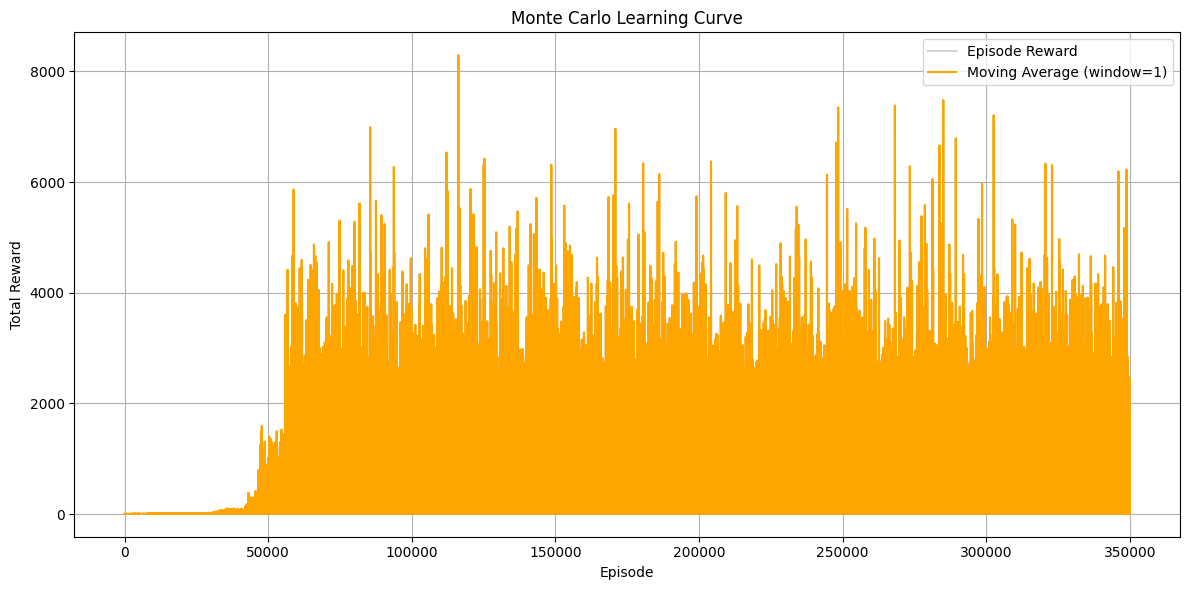

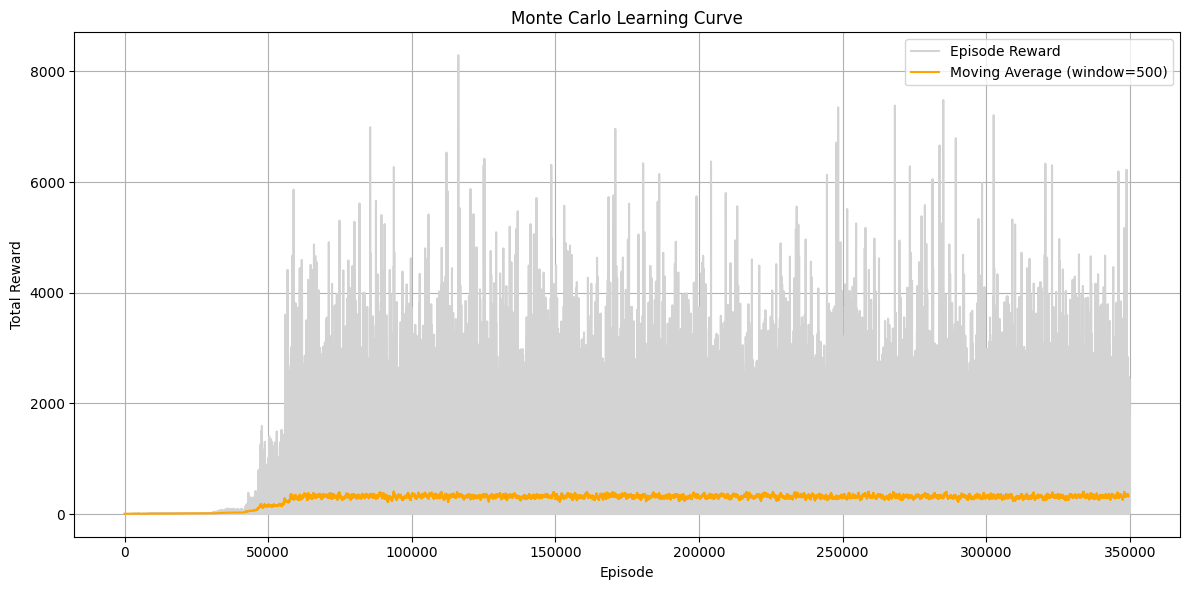

In [88]:
env = gym.make('TextFlappyBird-v0', height=15, width=20, pipe_gap=4)
agent_MC = MonteCarloAgent(eps=0.01, discount=0.99)
agent_MC.train(env , num_episodes=350000)

agent_MC.plot_monte_carlo_rewards(1)
agent_MC.plot_monte_carlo_rewards(500)
env.close()

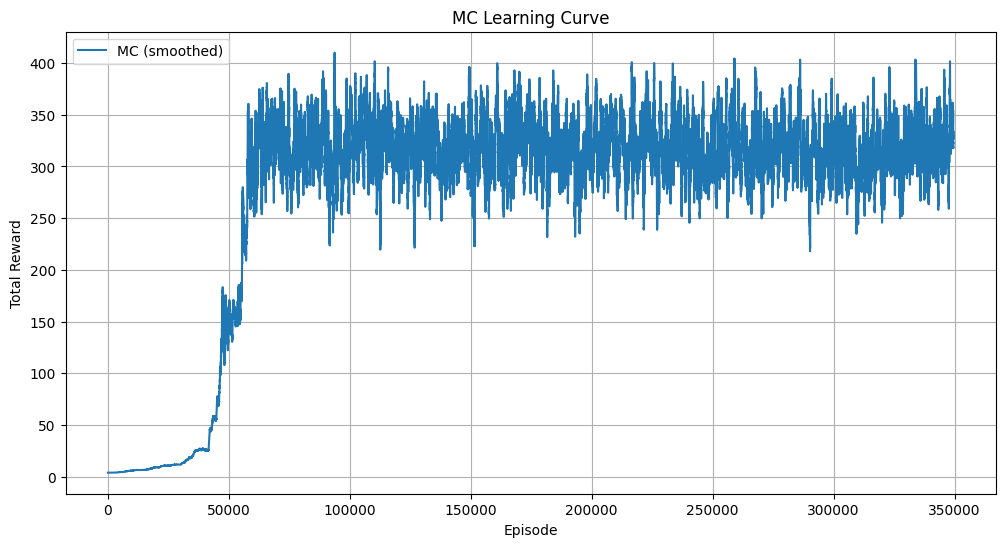

In [97]:
plot_rewards(agent_MC.rewards)

In [ ]:
print(np.mean(agent_MC.rewards[99990 : ]))


316.6


### effect of eps on our monte carlo agent


Training MC agent with eps = 0.001


Monte Carlo Training: 100%|██████████| 170000/170000 [00:15<00:00, 11305.70it/s]



Training MC agent with eps = 0.01


Monte Carlo Training: 100%|██████████| 170000/170000 [08:16<00:00, 342.46it/s] 



Training MC agent with eps = 0.1


Monte Carlo Training: 100%|██████████| 170000/170000 [02:12<00:00, 1279.49it/s]



Training MC agent with eps = 0.5


Monte Carlo Training: 100%|██████████| 170000/170000 [00:48<00:00, 3488.96it/s]



Training MC agent with eps = 0.7


Monte Carlo Training: 100%|██████████| 170000/170000 [00:37<00:00, 4534.37it/s]


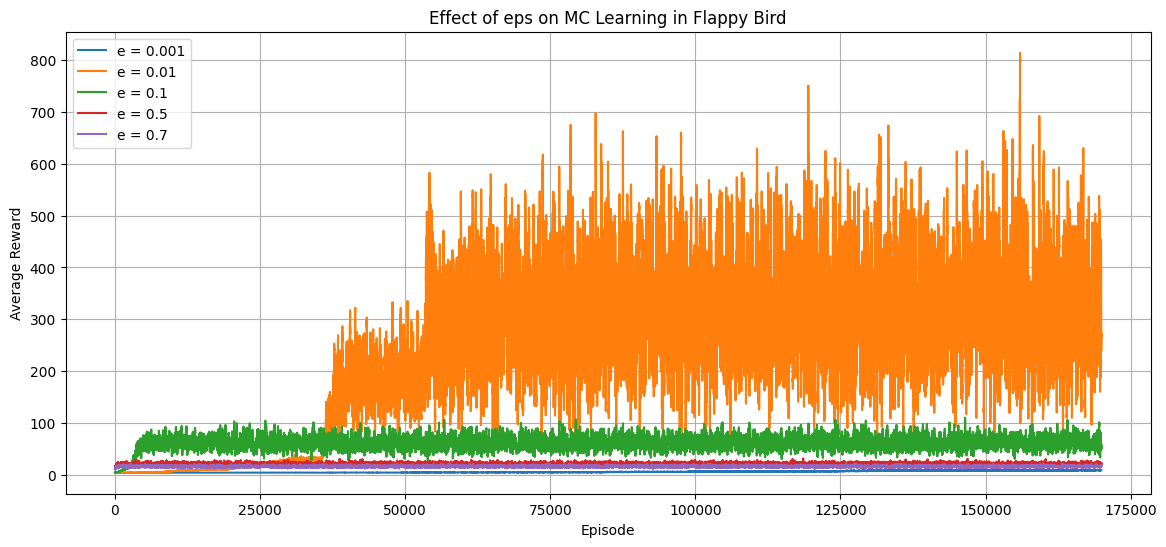

In [ ]:
eps__ = [0.001, 0.01, 0.1, 0.5, 0.7]
agents = {}
rewards_dict_eps_mc = {}

for i in eps__:
    print(f"\nTraining MC agent with eps = {i}")
    env = gym.make('TextFlappyBird-v0', height=15, width=20, pipe_gap=4)

    agent = MonteCarloAgent(eps= i ,  discount=0.99)
    agent.train(env, num_episodes=episodes_mc)

    agents[i] = agent
    rewards_dict_eps_mc[i] = agent.rewards

    env.close()


plt.figure(figsize=(14, 6))
window_size = 50

for i in eps__:
    rewards = rewards_dict_eps_mc[i]
    moving_avg = np.convolve(rewards, np.ones(window_size)/window_size, mode="valid")
    plt.plot(moving_avg, label=f"e = {i}")

plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.title("Effect of eps on MC Learning in Flappy Bird")
plt.legend()
plt.grid(True)
plt.show()

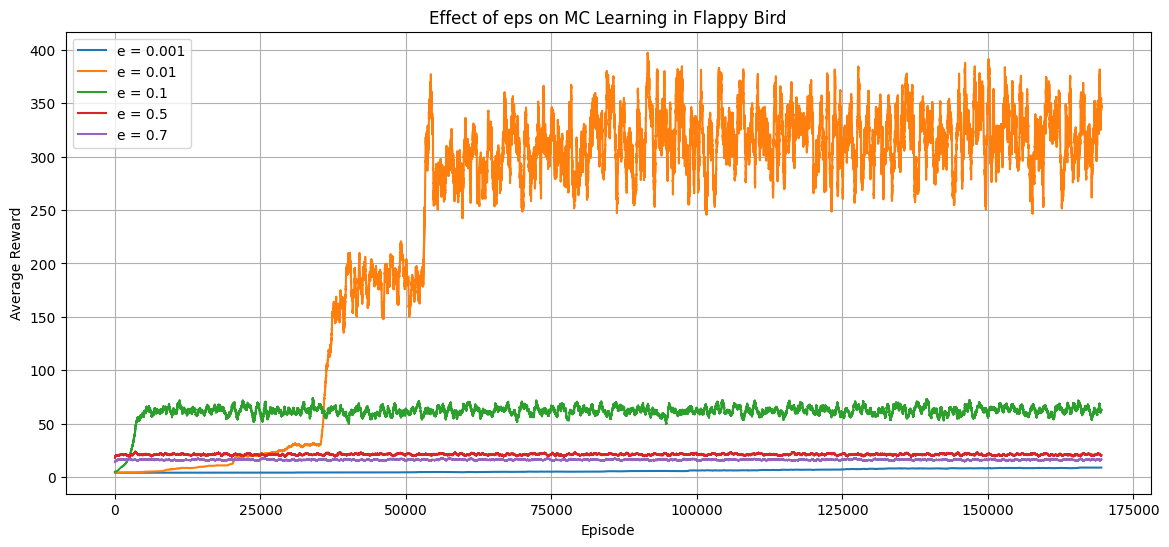

In [95]:
plt.figure(figsize=(14, 6))
window_size = 500

for i in eps__:
    rewards = rewards_dict_eps_mc[i]
    moving_avg = np.convolve(rewards, np.ones(window_size)/window_size, mode="valid")
    plt.plot(moving_avg, label=f"e = {i}")

plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.title("Effect of eps on MC Learning in Flappy Bird")
plt.legend()
plt.grid(True)
plt.show()


Training MC agent with discount = 0.1


Monte Carlo Training: 100%|██████████| 20000/20000 [00:01<00:00, 16274.52it/s]



Training MC agent with discount = 0.3


Monte Carlo Training: 100%|██████████| 20000/20000 [00:01<00:00, 14328.31it/s]



Training MC agent with discount = 0.5


Monte Carlo Training: 100%|██████████| 20000/20000 [00:01<00:00, 11880.80it/s]



Training MC agent with discount = 0.7


Monte Carlo Training: 100%|██████████| 20000/20000 [00:02<00:00, 8157.00it/s]



Training MC agent with discount = 0.99


Monte Carlo Training: 100%|██████████| 20000/20000 [00:02<00:00, 6944.41it/s]


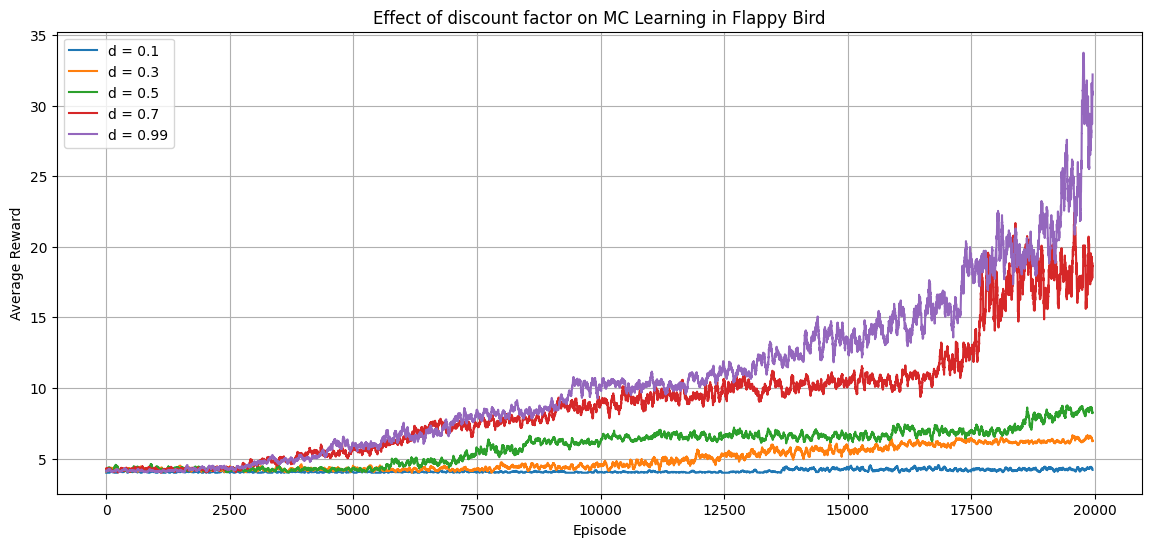

In [ ]:
disc__ = [0.1, 0.3, 0.5, 0.7, 0.99]
agents = {}
rewards_dict_disc_mc = {}

for i in disc__:
    print(f"\nTraining MC agent with discount = {i}")
    env = gym.make('TextFlappyBird-v0', height=15, width=20, pipe_gap=4)

    agent = MonteCarloAgent(eps= 0.02 ,  discount= i )
    agent.train(env, num_episodes=sarsa_episode)

    agents[i] = agent
    rewards_dict_disc_mc[i] = agent.rewards

    env.close()


plt.figure(figsize=(14, 6))
window_size = 50

for i in disc__:
    rewards = rewards_dict_disc_mc[i]
    moving_avg = np.convolve(rewards, np.ones(window_size)/window_size, mode="valid")
    plt.plot(moving_avg, label=f"d = {i}")

plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.title("Effect of discount factor on MC Learning in Flappy Bird")
plt.legend()
plt.grid(True)
plt.show()

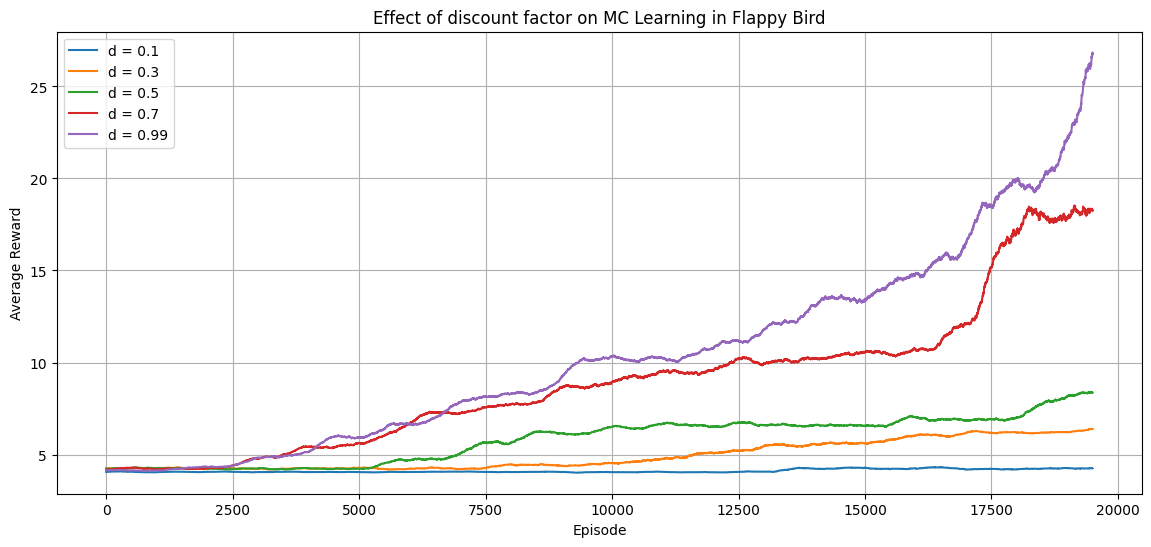

In [ ]:

plt.figure(figsize=(14, 6))
window_size = 500

for i in disc__:
    rewards = rewards_dict_disc_mc[i]
    moving_avg = np.convolve(rewards, np.ones(window_size)/window_size, mode="valid")
    plt.plot(moving_avg, label=f"d = {i}")

plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.title("Effect of discount factor on MC Learning in Flappy Bird")
plt.legend()
plt.grid(True)
plt.show()

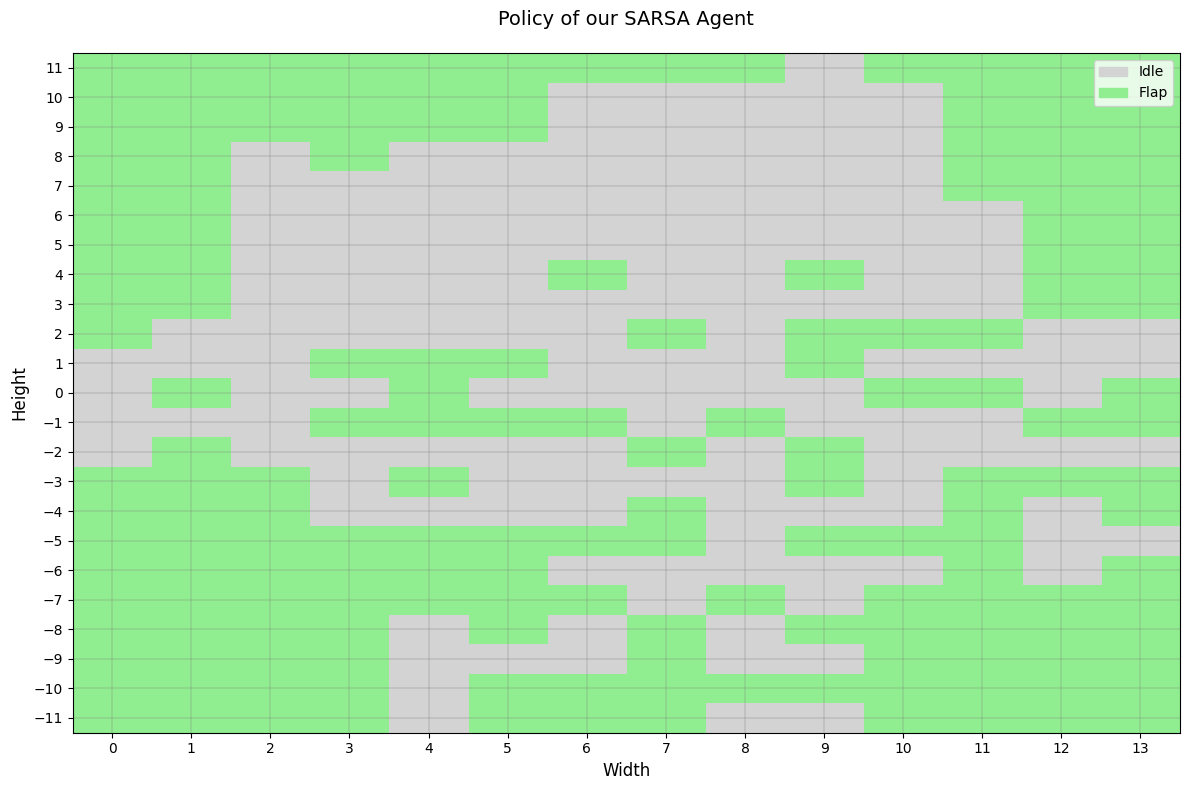

In [85]:
plot_policy(agent_MC.q)

## In this section we will Plot the state value function of our agents 

In [ ]:
def plot_gridworld_value_function(V):

    def get_Z(x, y, usable_ace):
        if (x,y) in V:
            return V[x,y]
        else:
            return 0

   
    xs = [state[0] for state in V.keys()]
    ys = [state[1] for state in V.keys()]
    
    x_range = np.arange(min(xs), max(xs) + 1)
    y_range = np.arange(min(ys), max(ys) + 1)
    
    X, Y = np.meshgrid(x_range, y_range)
    
   
    Z = np.array([
        [V.get((x, y)) for x in x_range]
        for y in y_range
    ])

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                           cmap=plt.cm.coolwarm, edgecolor='k')
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('V(x, y)')
    ax.set_title('State-Value Function')
    ax.view_init(elev=30, azim=135)
    
    fig.colorbar(surf)
    plt.tight_layout()
    plt.show()


### Sarsa state Value 

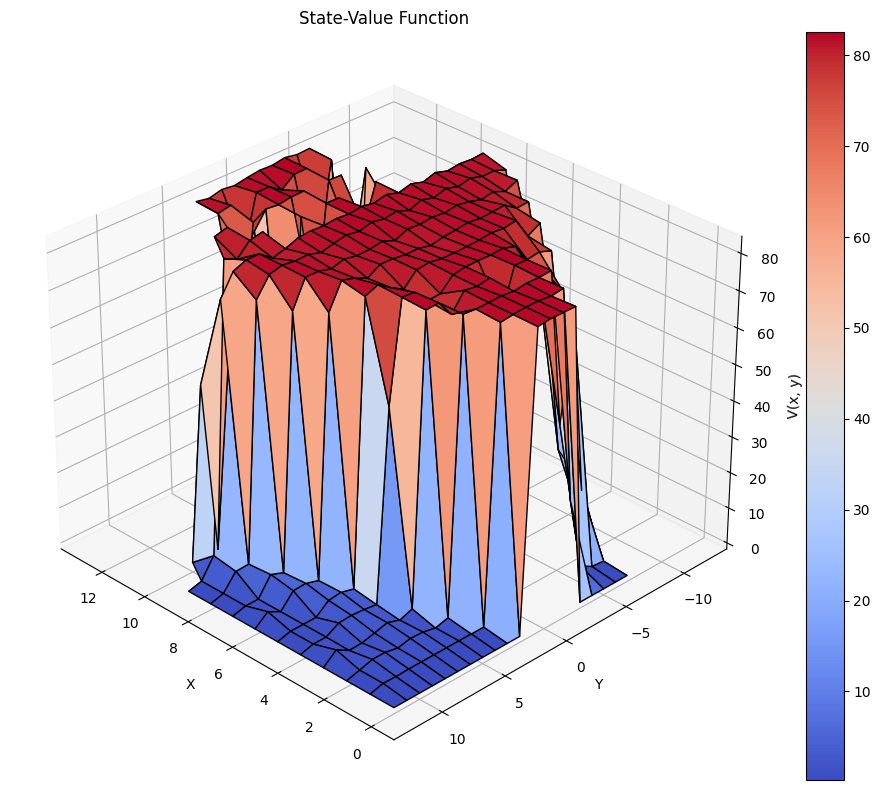

In [94]:
V_sarsa = {state: np.max(q_values) for state, q_values in agent_sarsa.q.items()}

plot_gridworld_value_function(V_sarsa)

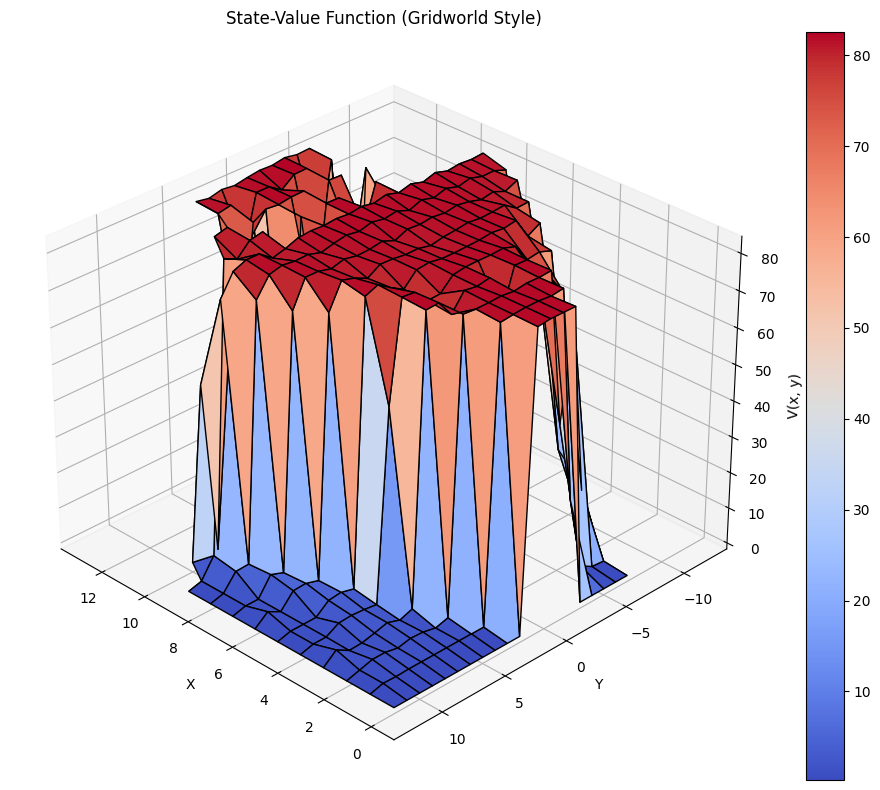

In [87]:
V_sarsa = {state: np.max(q_values) for state, q_values in agent_sarsa.q.items()}

plot_gridworld_value_function(V_sarsa)


### MC value state

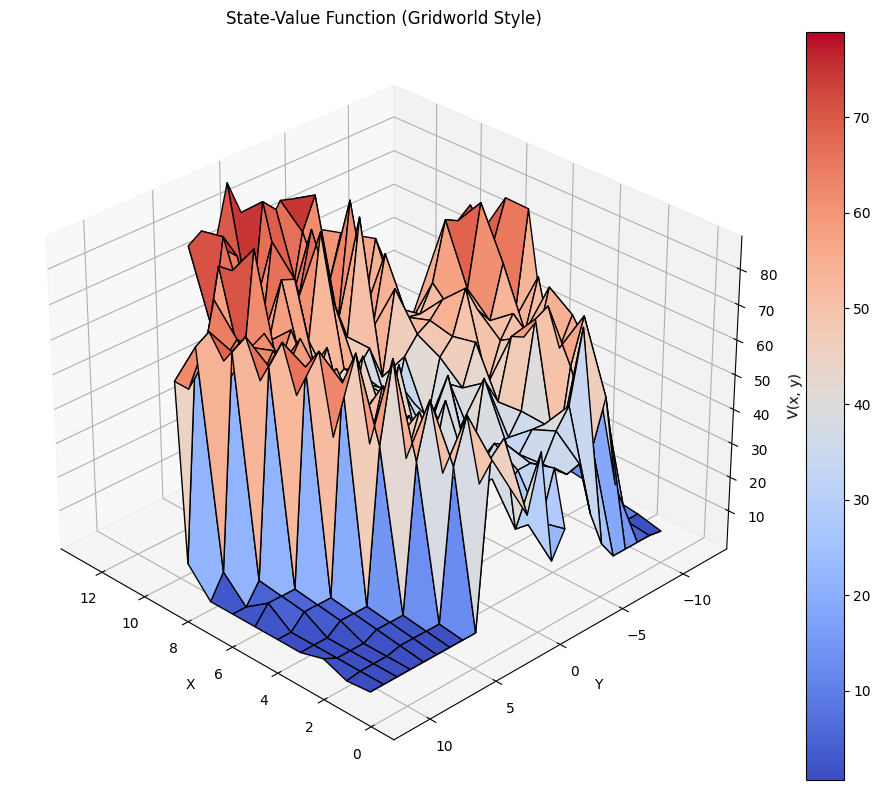

In [89]:
V = {state: np.max(q_values) for state, q_values in agent_MC.q.items()}

plot_gridworld_value_function(V)


### Test the agent in a deffirent environment

In [117]:
env = gym.make('TextFlappyBird-v0', height=11, width=14, pipe_gap=4)
reward_test = []
for episode in tqdm(range(1000), desc="Training Sarsa(λ) Agent"):
            state, _ = env.reset()
            done = False
            total_reward = 0

            

            action = agent_sarsa.select_action(state, env.action_space)

            while not done:
                next_state, reward, done, _, _ = env.step(action)
                next_action = agent_sarsa.select_action(next_state, env.action_space)
                
                state = next_state
                action = next_action
                total_reward += reward

            reward_test.append(total_reward)

Training Sarsa(λ) Agent: 100%|██████████| 1000/1000 [00:06<00:00, 164.56it/s]


In [118]:
np.mean(reward_test)

288.424